# Does indoor farming have more crop yields than conventional outdoor farming?

We are going to carry out a number of calculations to determine and see the difference between indor and outdoor farming.

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Loading the required data

In [ ]:
"""This data has the information we need from 2016 to 2019"""
df = pd.read_csv("TLC_indoor_vs_outdoor.csv")
df.head()

,Food,Farming types,Space (Sq. ft,Number of harvests,Average amount of harvest all year (lbs),Produce per sq. ft (lbs)
0,Cucumber,Outdoor,"43,560",52.0,"1,146,600",26.32
1,Cucumber,Indoor,"40,902.86",52.0,"1,285,118.62",31.42
2,Lettuce,Outdoor,"40,000",2.0,"48,000",1.20
3,Lettuce,Indoor,400.00,10.5,"7,846.67",19.62
4,Tomato,Outdoor,"43,560",3.0,37500,0.86


#### Creating a graph to further understand the above data, We can have a scatterplot with both indoorand outdoor data and select the "Farming types" column as the hue to differentiate between the indoor and outdoor datapoints

Text(0.5, 1.08, 'Scatterplot showing the difference between indoor and outdoor farming through the differences in the produce per sq ft.')

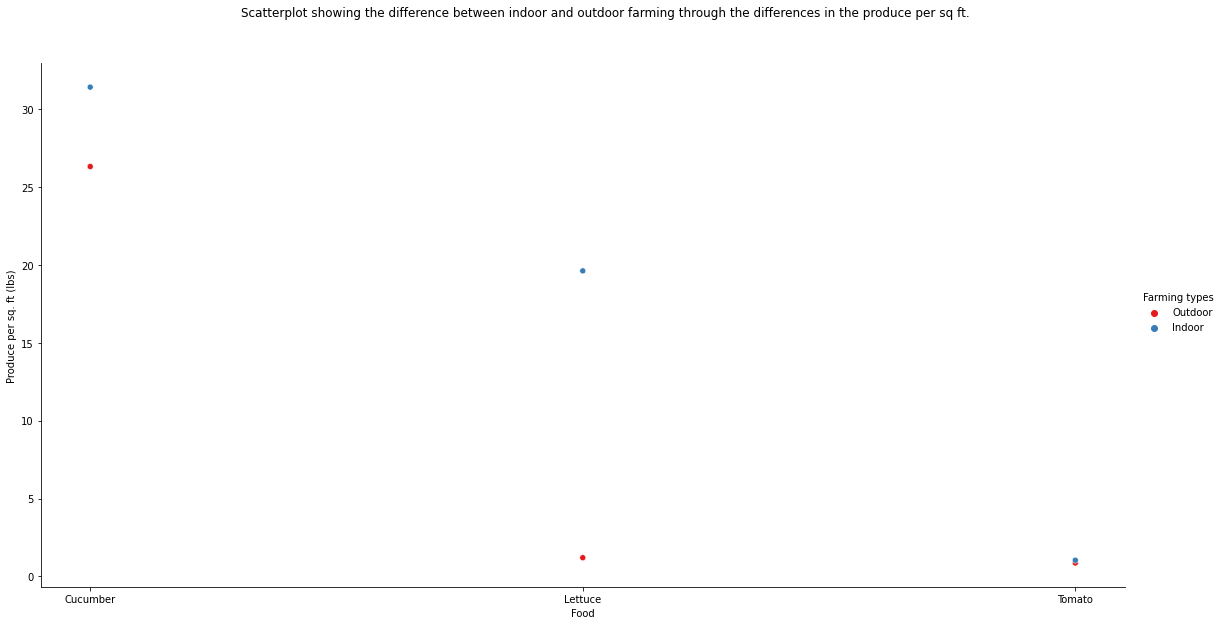

In [ ]:
plot_1 =  sns.pairplot(df, x_vars = ["Food"], y_vars = ["Produce per sq. ft (lbs)"], height = 8, aspect  = 2, hue = "Farming types", palette = "Set1")
plot_1.fig.suptitle("Scatterplot showing the difference between indoor and outdoor farming through the differences in the produce per sq ft.", y=1.08) 

##### As seen in the scatterplot above, indoor farming is alway seen to have a higher produce per sq. ft, making more space efficient and thus if it had the same space as a conventional farm, it would harvest more produce

### Now, we will look at the data associated with different crops. For our work, we will stay consistent with just Tomatoes, Lettuce and Cucumbers grown in the USA.

In [ ]:
df_crop = pd.read_csv("FAOSTAT_data_L_T_C.csv")
df_crop.head(5)

,Area,Element,Item,Year,Unit,Value
0,United States of America,Area harvested,Cucumbers and gherkins,2016,ha,46417
1,United States of America,Area harvested,Cucumbers and gherkins,2017,ha,47430
2,United States of America,Area harvested,Cucumbers and gherkins,2018,ha,44880
3,United States of America,Area harvested,Cucumbers and gherkins,2019,ha,40793
4,United States of America,Yield,Cucumbers and gherkins,2016,hg/ha,169262


### Sectioning the data makes understanding the data easier. So, we will section the data by the item, and then by the year.

In [ ]:
"""Sectioning the data by the item"""


df_tomato = df_crop.loc[df_crop["Item"]==("Tomatoes")]

df_tom_yield = df_tomato.loc[df_tomato["Element"] == ("Yield")]

df_tom_prod = df_tomato.loc[df_tomato["Element"] == ("Production")]


df_cucumber = df_crop.loc[df_crop["Item"]==("Cucumbers and gherkins")]

df_cuc_yield = df_cucumber.loc[df_cucumber["Element"] == ("Yield")]

df_cuc_prod = df_cucumber.loc[df_cucumber["Element"] == ("Production")]


df_lettuce = df_crop.loc[df_crop["Item"]==("Lettuce and chicory")]

df_let_yield = df_lettuce.loc[df_lettuce["Element"] == ("Yield")]

df_let_prod = df_lettuce.loc[df_lettuce["Element"] == ("Production")]


df_let_yield

,Area,Element,Item,Year,Unit,Value
16,United States of America,Yield,Lettuce and chicory,2016,hg/ha,365324
17,United States of America,Yield,Lettuce and chicory,2017,hg/ha,342429
18,United States of America,Yield,Lettuce and chicory,2018,hg/ha,316008
19,United States of America,Yield,Lettuce and chicory,2019,hg/ha,350953


In [ ]:
"""By year and yield"""

# df_y = df_yield
df_y = df_crop.loc[df_crop["Element"] == ("Yield")]

df_y_2016 = df_y.loc[df_y["Year"] == (2016)] 
df_y_2017 = df_y.loc[df_y["Year"] == (2017)] 
df_y_2018 = df_y.loc[df_y["Year"] == (2018)] 
df_y_2019 = df_y.loc[df_y["Year"] == (2019)] 
df_y_2016

,Area,Element,Item,Year,Unit,Value
4,United States of America,Yield,Cucumbers and gherkins,2016,hg/ha,169262
16,United States of America,Yield,Lettuce and chicory,2016,hg/ha,365324
28,United States of America,Yield,Tomatoes,2016,hg/ha,911398


In [ ]:
"""By year and production amount"""

df_p = df_crop.loc[df_crop["Element"] == ("Production")]

df_p_2016 = df_p.loc[df_p["Year"] == (2016)] 
df_p_2017 = df_p.loc[df_p["Year"] == (2017)] 
df_p_2018 = df_p.loc[df_p["Year"] == (2018)] 
df_p_2019 = df_p.loc[df_p["Year"] == (2019)] 
df_p_2016

,Area,Element,Item,Year,Unit,Value
8,United States of America,Production,Cucumbers and gherkins,2016,tonnes,785663
20,United States of America,Production,Lettuce and chicory,2016,tonnes,4682031
32,United States of America,Production,Tomatoes,2016,tonnes,12877049


#### We can now make plots based on the sectioning we previously did.

Text(0, 0.5, 'Yield (hg/ha)')

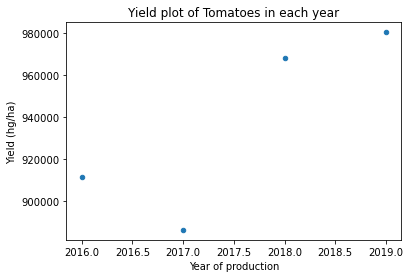

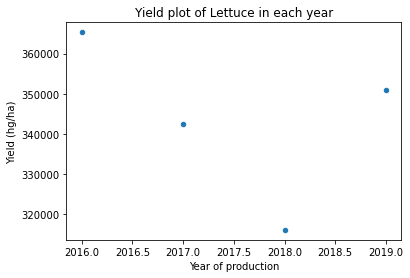

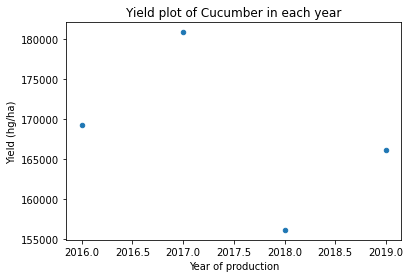

In [ ]:
""" I decided to use scatter plots because it shows the difference the 
    yield better than other graphs"""


"""Yield plots"""
plot_2= df_tom_yield.plot(x ="Year",  y ="Value", kind = "scatter")
plot_2.set_title("Yield plot of Tomatoes in each year")
plot_2.set_xlabel("Year of production")
plot_2.set_ylabel("Yield (hg/ha)")

plot_3= df_let_yield.plot(x ="Year",  y ="Value", kind = "scatter")
plot_3.set_title("Yield plot of Lettuce in each year")
plot_3.set_xlabel("Year of production")
plot_3.set_ylabel("Yield (hg/ha)")

plot_4= df_cuc_yield.plot(x ="Year",  y ="Value", kind = "scatter")
plot_4.set_title("Yield plot of Cucumber in each year")
plot_4.set_xlabel("Year of production")
plot_4.set_ylabel("Yield (hg/ha)")




Text(0, 0.5, 'Amount of produce (tonnes)')

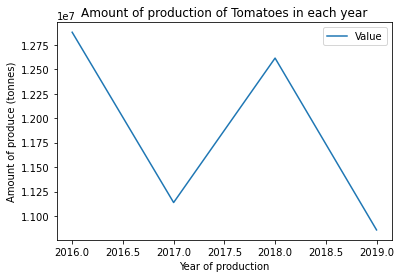

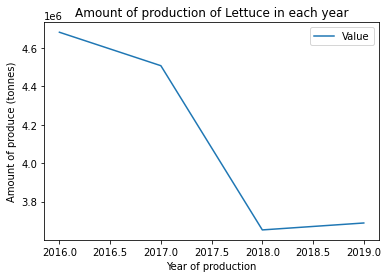

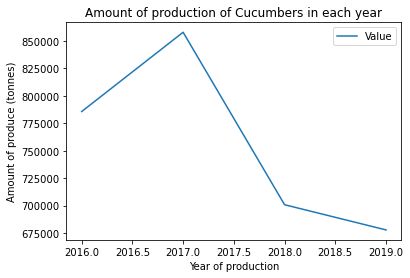

In [ ]:
"""These are goiing to be line plots showing the trend in production of the three different crops"""

plot_5= df_tom_prod.plot(x ="Year",  y ="Value", kind = "line")
plot_5.set_title("Amount of production of Tomatoes in each year")
plot_5.set_xlabel("Year of production")
plot_5.set_ylabel("Amount of produce (tonnes)")

plot_6= df_let_prod.plot(x ="Year",  y ="Value", kind = "line")
plot_6.set_title("Amount of production of Lettuce in each year")
plot_6.set_xlabel("Year of production")
plot_6.set_ylabel("Amount of produce (tonnes)")

plot_7= df_cuc_prod.plot(x ="Year",  y ="Value", kind = "line")
plot_7.set_title("Amount of production of Cucumbers in each year")
plot_7.set_xlabel("Year of production")
plot_7.set_ylabel("Amount of produce (tonnes)")


#### As seen above, we can tell that there is a decrease in the amount of crop production in conventional farm. This could be due to a number of factors such as change in weather and recently due to COVID-19

### Part 2: Looking at the variables of outdoor farming such as rainfall and temperature

#### Loading the required data

In [ ]:
"""This has the information we need from 1970 to 2019"""
df_F = pd.read_csv("USA_FAOSTAT.csv")
df_F

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,231,United States of America,5419,Yield,221,"Almonds, with shell",1970,1970,hg/ha,16360.0,Fc,Calculated data
1,QCL,Crops and livestock products,231,United States of America,5419,Yield,221,"Almonds, with shell",1971,1971,hg/ha,15995.0,Fc,Calculated data
2,QCL,Crops and livestock products,231,United States of America,5419,Yield,221,"Almonds, with shell",1972,1972,hg/ha,14088.0,Fc,Calculated data
3,QCL,Crops and livestock products,231,United States of America,5419,Yield,221,"Almonds, with shell",1973,1973,hg/ha,14063.0,Fc,Calculated data
4,QCL,Crops and livestock products,231,United States of America,5419,Yield,221,"Almonds, with shell",1974,1974,hg/ha,18326.0,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9251,QCL,Crops and livestock products,231,United States of America,5510,Production,15,Wheat,2015,2015,tonnes,55839540.0,NaN,Official data
9252,QCL,Crops and livestock products,231,United States of America,5510,Production,15,Wheat,2016,2016,tonnes,62831507.0,NaN,Official data
9253,QCL,Crops and livestock products,231,United States of America,5510,Production,15,Wheat,2017,2017,tonnes,47379810.0,NaN,Official data
9254,QCL,Crops and livestock products,231,United States of America,5510,Production,15,Wheat,2018,2018,tonnes,51305540.0,NaN,Official data


In [ ]:
"""Cleaning the data"""
df_1 = df_F.drop("Year Code",1).drop("Area Code (FAO)",1).drop("Element Code",1).drop("Element", 1).drop("Domain",1).drop("Domain Code", 1).drop("Item Code (FAO)", 1).drop("Flag", 1).drop("Flag Description", 1).dropna()
df_1

,Area,Item,Year,Unit,Value
0,United States of America,"Almonds, with shell",1970,hg/ha,16360.0
1,United States of America,"Almonds, with shell",1971,hg/ha,15995.0
2,United States of America,"Almonds, with shell",1972,hg/ha,14088.0
3,United States of America,"Almonds, with shell",1973,hg/ha,14063.0
4,United States of America,"Almonds, with shell",1974,hg/ha,18326.0
...,...,...,...,...,...
9251,United States of America,Wheat,2015,tonnes,55839540.0
9252,United States of America,Wheat,2016,tonnes,62831507.0
9253,United States of America,Wheat,2017,tonnes,47379810.0
9254,United States of America,Wheat,2018,tonnes,51305540.0


#### Now we can bring in the rainfall and temperature data, and combine it with df_1

In [ ]:
"""df_r = rainfall data"""
df_r = pd.read_csv("API_AG.LND.PRCP.MM_DS2_en_csv_v2_2711956.csv").drop("Indicator_Code", 1).drop("Country_Code", 1)
df_r

,Country Name,Indicator_Name,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
0,Aruba,Average precipitation in depth (mm per year),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,Average precipitation in depth (mm per year),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Average precipitation in depth (mm per year),327.0,327.0,327.0,327.0,327.0,327.0,327.0,327.0,327.0,327.0,327.0,327.0
3,Africa Western and Central,Average precipitation in depth (mm per year),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Average precipitation in depth (mm per year),1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,Average precipitation in depth (mm per year),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",Average precipitation in depth (mm per year),167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0,167.0
263,South Africa,Average precipitation in depth (mm per year),495.0,495.0,495.0,495.0,495.0,495.0,495.0,495.0,495.0,495.0,495.0,495.0
264,Zambia,Average precipitation in depth (mm per year),1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0


#### We can localize it to just USA to see the average national rainfall

In [ ]:
df_USA = df_r.loc[df_r["Country Name"] == ("United States")].rename(columns={"Country Name": "Area"})
df_USA

,Area,Indicator_Name,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
251,United States,Average precipitation in depth (mm per year),715.0,715.0,715.0,715.0,715.0,715.0,715.0,715.0,715.0,715.0,715.0,715.0


In [ ]:
"""df_t = temperture data, This dataset has data rom 2010 to 2020"""

df_t = pd.read_csv("temp_data.csv").drop("Domain Code", 1).drop("Domain", 1).drop("Element Code",1).drop("Element", 1).drop("Year Code",1).drop("Flag", 1).drop("Flag Description", 1).drop("Months Code",1).rename(columns = {"Value":"Value in Celsius"}).drop("Unit",1)
df_t.head(5)

,Area Code (FAO),Area,Months,Year,Value in Celsius
0,231,United States of America,Dec–Jan–Feb,2010,-0.092
1,231,United States of America,Dec–Jan–Feb,2011,-0.017
2,231,United States of America,Dec–Jan–Feb,2012,1.935
3,231,United States of America,Dec–Jan–Feb,2013,1.284
4,231,United States of America,Dec–Jan–Feb,2014,0.464


#### For now, we will combine the temperature data and df_1

In [ ]:
df_merge = pd.merge(df_1, df_t, on=["Year", "Area"])
df_merge

,Area,Item,Year,Unit,Value,Area Code (FAO),Months,Value in Celsius
0,United States of America,"Almonds, with shell",2010,hg/ha,45371.0,231,Dec–Jan–Feb,-0.092
1,United States of America,"Almonds, with shell",2010,hg/ha,45371.0,231,Mar–Apr–May,0.997
2,United States of America,"Almonds, with shell",2010,hg/ha,45371.0,231,Jun–Jul–Aug,0.889
3,United States of America,"Almonds, with shell",2010,hg/ha,45371.0,231,Sep–Oct–Nov,0.982
4,United States of America,"Almonds, with shell",2010,tonnes,1413800.0,231,Dec–Jan–Feb,-0.092
...,...,...,...,...,...,...,...,...
7435,United States of America,Wheat,2019,hg/ha,34748.0,231,Sep–Oct–Nov,0.775
7436,United States of America,Wheat,2019,tonnes,52257620.0,231,Dec–Jan–Feb,1.366
7437,United States of America,Wheat,2019,tonnes,52257620.0,231,Mar–Apr–May,1.073
7438,United States of America,Wheat,2019,tonnes,52257620.0,231,Jun–Jul–Aug,0.945


#### We can section this out to have only Tomato, Lettuce and Cucumbers as well

In [ ]:
"""Here, we are choosing the rows to keep and eliminating the rest using .loc[]"""

df_tom_merge = df_merge.loc[df_merge["Item"] == ("Tomatoes")].loc[df_merge["Unit"] == ("hg/ha")]
df_let_merge = df_merge.loc[df_merge["Item"] == ("Lettuce and chicory")].loc[df_merge["Unit"] == ("hg/ha")]
df_cuc_merge = df_merge.loc[df_merge["Item"] == ('Cucumbers and gherkins')].loc[df_merge["Unit"] == ("hg/ha")]

In [ ]:
"""We can combine the above three into one dataset"""

crop_m =  pd.concat([df_tom_merge, df_let_merge, df_cuc_merge])
crop_merge = crop_m.drop("Area Code (FAO)", 1).rename(columns = {"Value_y":"temp"}).rename(columns = {"Value":"Yield"})
crop_merge

,Area,Item,Year,Unit,Yield,Months,Value in Celsius
700,United States of America,Tomatoes,2010,hg/ha,885396.0,Dec–Jan–Feb,-0.092
701,United States of America,Tomatoes,2010,hg/ha,885396.0,Mar–Apr–May,0.997
702,United States of America,Tomatoes,2010,hg/ha,885396.0,Jun–Jul–Aug,0.889
703,United States of America,Tomatoes,2010,hg/ha,885396.0,Sep–Oct–Nov,0.982
1448,United States of America,Tomatoes,2011,hg/ha,924535.0,Dec–Jan–Feb,-0.017
...,...,...,...,...,...,...,...
6175,United States of America,Cucumbers and gherkins,2018,hg/ha,156154.0,Sep–Oct–Nov,0.790
6916,United States of America,Cucumbers and gherkins,2019,hg/ha,166176.0,Dec–Jan–Feb,1.366
6917,United States of America,Cucumbers and gherkins,2019,hg/ha,166176.0,Mar–Apr–May,1.073
6918,United States of America,Cucumbers and gherkins,2019,hg/ha,166176.0,Jun–Jul–Aug,0.945


#### Now we can plot the temperature data of USA

Text(0, 0.5, 'Temperature (celsius)')

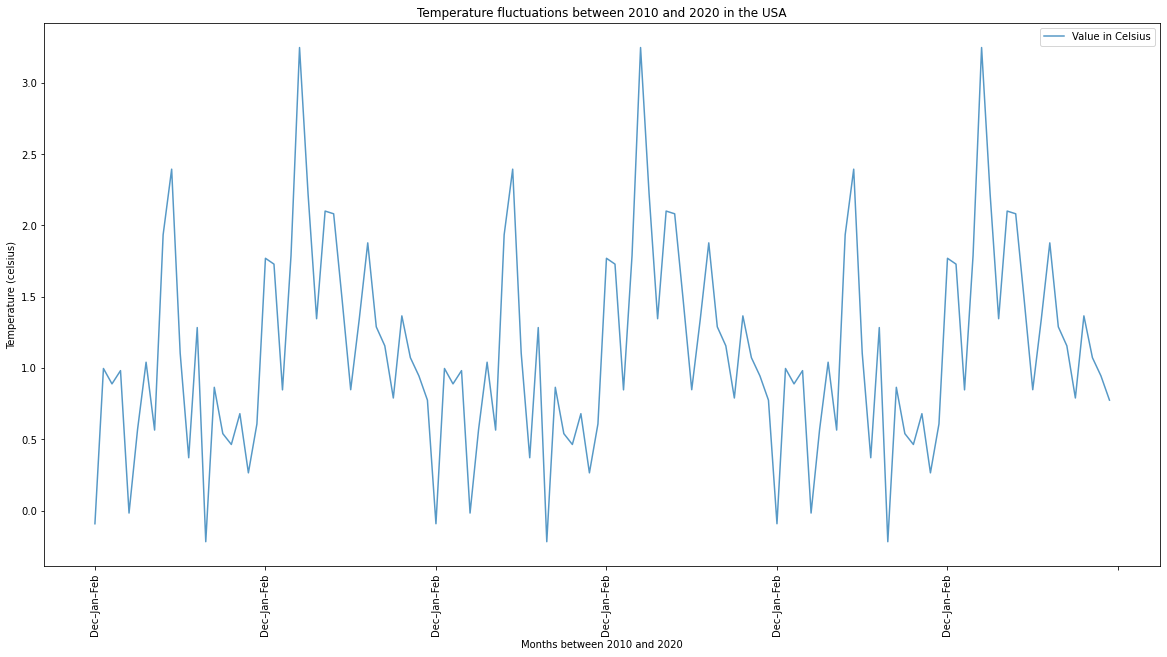

In [ ]:
temp_plot = crop_merge.plot( x = "Months", y = "Value in Celsius", kind = "line",alpha=0.75, rot=90, figsize = (20, 10))
temp_plot.set_title("Temperature fluctuations between 2010 and 2020 in the USA")
temp_plot.set_xlabel("Months between 2010 and 2020")
temp_plot.set_ylabel("Temperature (celsius)")

#### We can plot  yield  to see the trend in prodution

Text(0.5, 1.08, 'Scatterplot showing the yearly yield of crops between 2010 and 2020.')

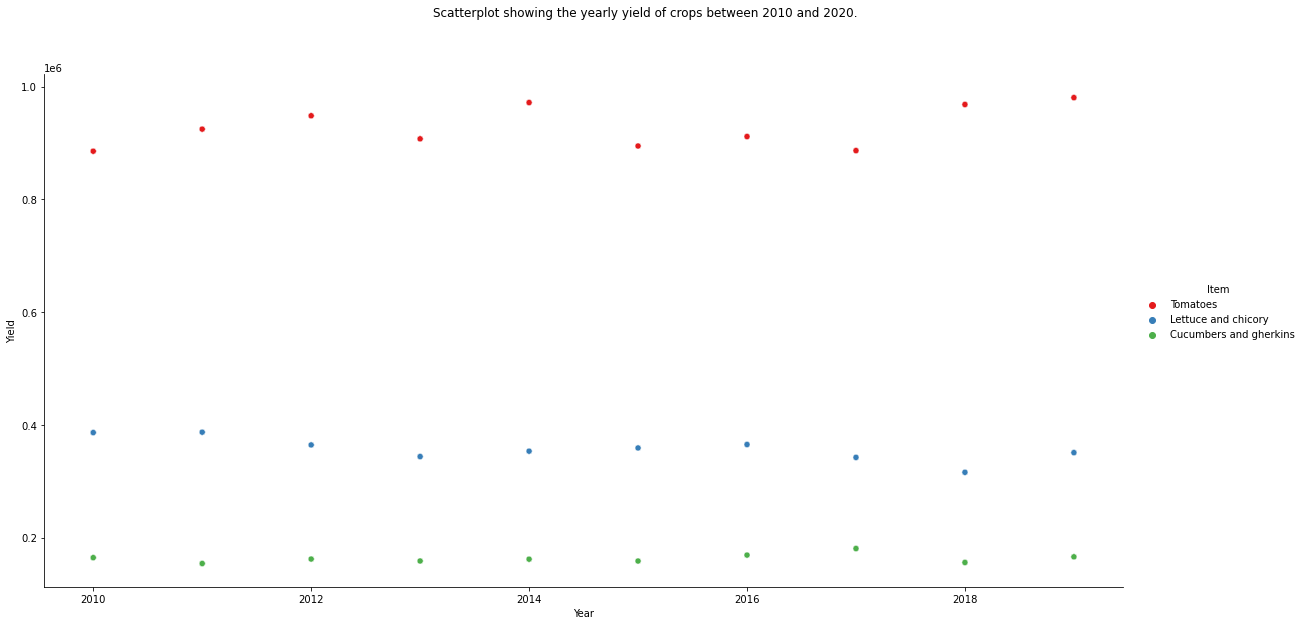

In [ ]:
plot_8 =   sns.pairplot(crop_merge, x_vars = ["Year"], y_vars = ["Yield"],  height = 8, aspect =2, hue = "Item",  palette = "Set1")
plot_8.fig.suptitle("Scatterplot showing the yearly yield of crops between 2010 and 2020.", y=1.08) 

### We can also show the rainfall and temperature data of 3 states in the USA; Texas, Maryland and Georgia

In [ ]:
"""contain data from 2000 to 2020"""
t_data = pd.read_csv("Texas rain and temp.csv")
m_data = pd.read_csv("Maryland_rain_temp.csv")
g_data = pd.read_csv("Georgia rain and temp updated.csv")
m_data

,Date,ppt (mm),tmean (degrees C)
0,Jan-00,77.88,0.4
1,Feb-00,69.65,3.2
2,Mar-00,136.76,9.2
3,Apr-00,114.46,11.8
4,May-00,89.94,18.8
...,...,...,...
248,Sep-20,90.31,18.9
249,Oct-20,103.31,14.1
250,Nov-20,96.97,9.8
251,Dec-20,157.89,2.7


Text(0.5, 1.0, 'Pattern of temperature from 2000 to 2020')

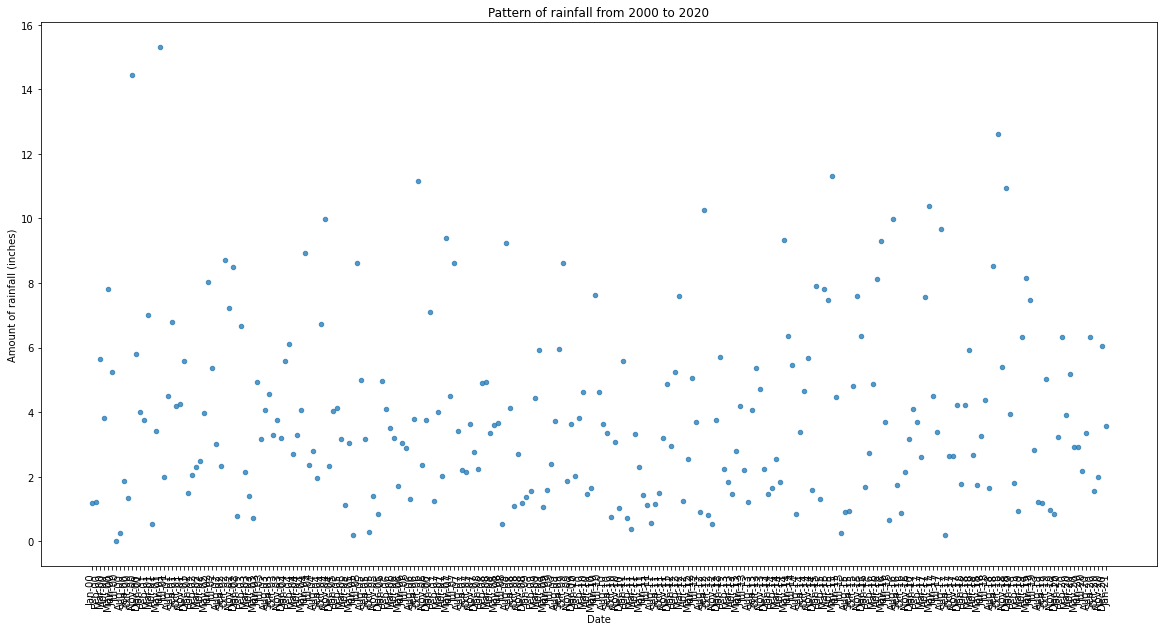

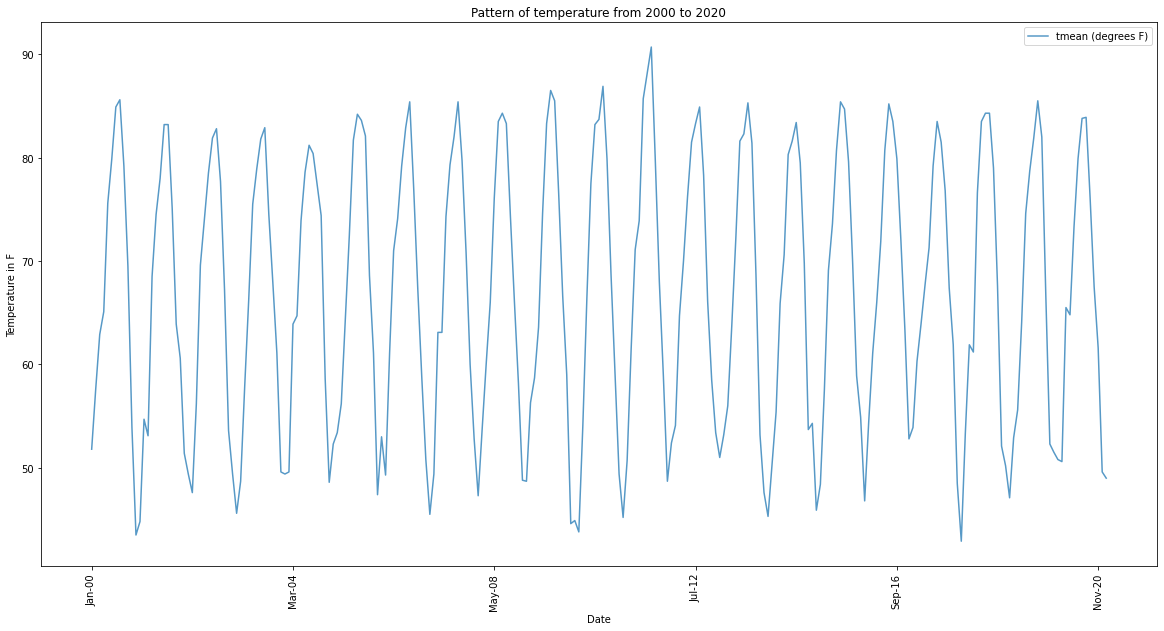

In [ ]:
"""We can plot both the rain and temperature data for each state"""
"""Texas plots"""
t_rain_plot = h_data.plot(x = "Date", y = "ppt (inches)", kind = "scatter", alpha=0.75, rot=90,figsize = (20, 10) )
t_rain_plot.set_xlabel("Date")
t_rain_plot.set_ylabel("Amount of rainfall (inches)")
t_rain_plot.set_title("Pattern of rainfall from 2000 to 2020")

t_temp = h_data.plot(x = "Date", y = "tmean (degrees F)", kind = "line", alpha=0.75, rot=90,figsize = (20, 10) )
t_temp.set_xlabel("Date")
t_temp.set_ylabel("Temperature in F")
t_temp.set_title("Pattern of temperature from 2000 to 2020")


Text(0.5, 1.0, 'Pattern of temperature from 2000 to 2020')

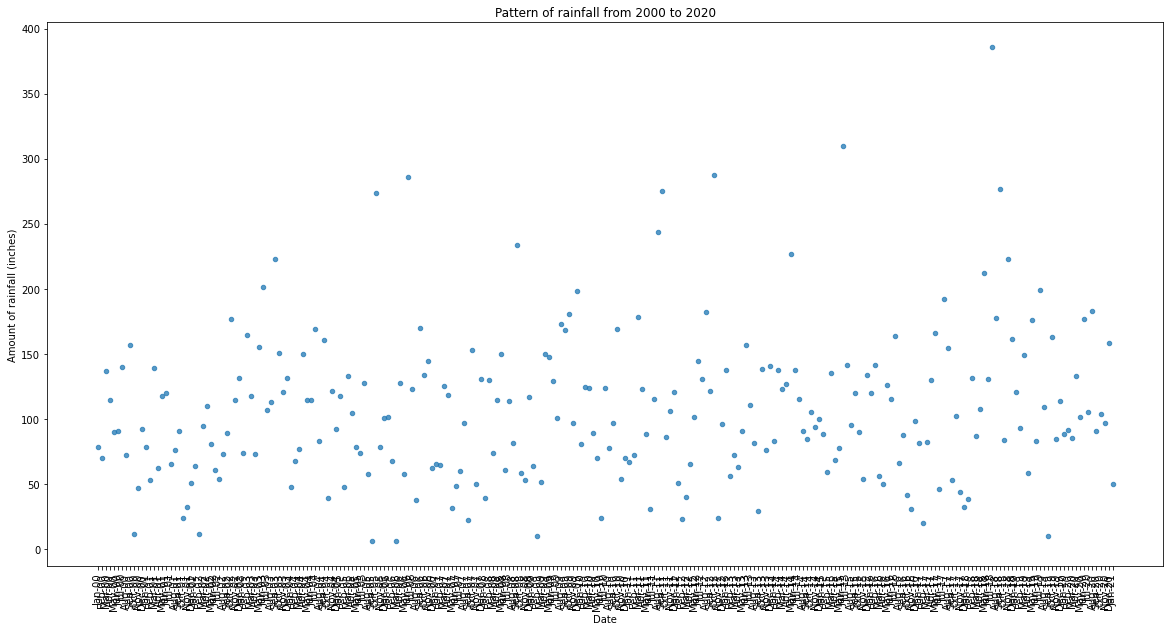

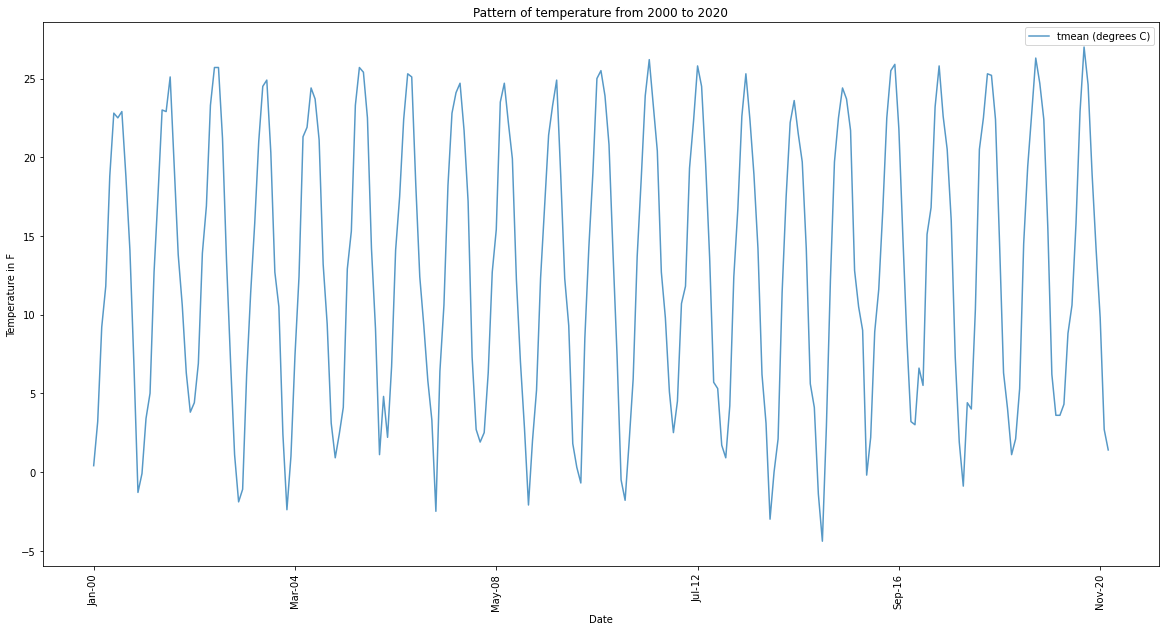

In [ ]:
"""Maryland plots"""
m_rain_plot = m_data.plot(x = "Date", y = "ppt (mm)", kind = "scatter", alpha=0.75, rot=90,figsize = (20, 10) )
m_rain_plot.set_xlabel("Date")
m_rain_plot.set_ylabel("Amount of rainfall (inches)")
m_rain_plot.set_title("Pattern of rainfall from 2000 to 2020")

m_temp = m_data.plot(x = "Date", y = "tmean (degrees C)", kind = "line", alpha=0.75, rot=90,figsize = (20, 10) )
m_temp.set_xlabel("Date")
m_temp.set_ylabel("Temperature in C")
m_temp.set_title("Pattern of temperature from 2000 to 2020")


Text(0.5, 1.0, 'Pattern of temperature from 2000 to 2020')

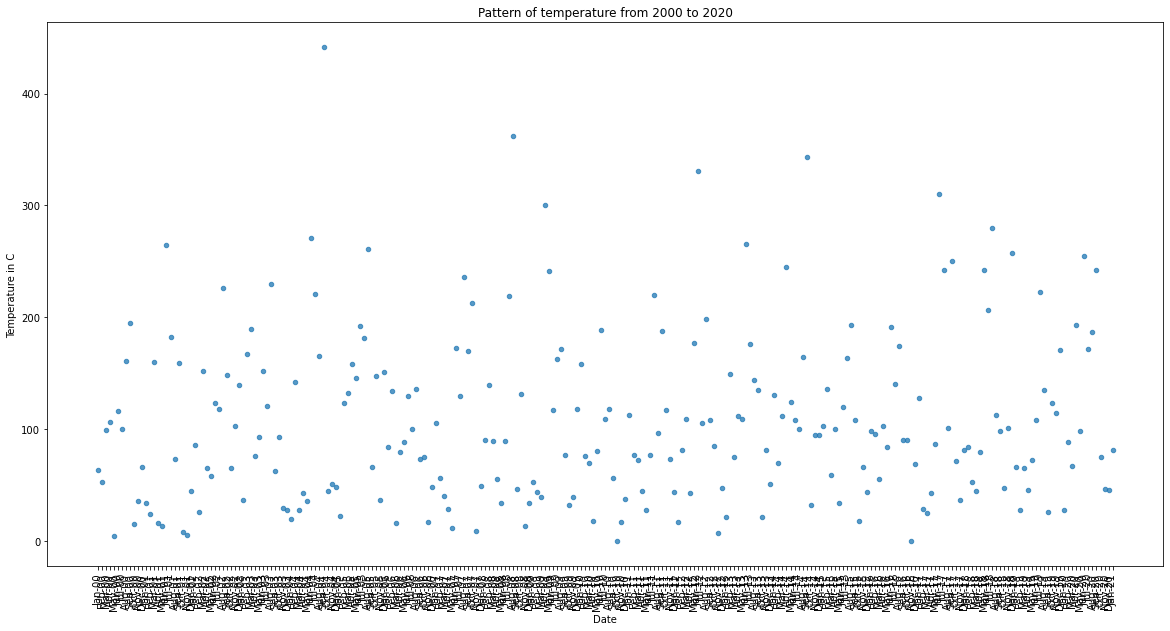

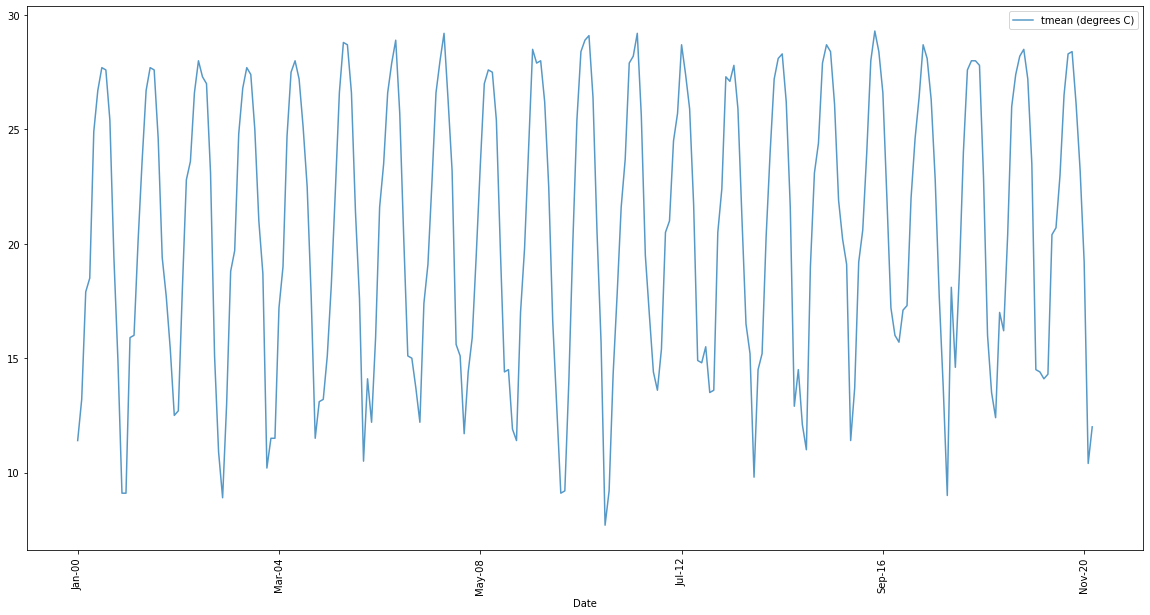

In [ ]:
"""Georgia plots"""
g_rain_plot = g_data.plot(x = "Date", y = "ppt (mm)", kind = "scatter", alpha=0.75, rot=90,figsize = (20, 10) )
g_rain_plot.set_xlabel("Date")
g_rain_plot.set_ylabel("Amount of rainfall (inches)")
g_rain_plot.set_title("Pattern of rainfall from 2000 to 2020")

g_temp = g_data.plot(x = "Date", y = "tmean (degrees C)", kind = "line", alpha=0.75, rot=90,figsize = (20, 10) )
g_rain_plot.set_xlabel("Date")
g_rain_plot.set_ylabel("Temperature in C")
g_rain_plot.set_title("Pattern of temperature from 2000 to 2020")
